# Naive Bayes Classifier

- Naive Bayes is a simple technique for constructing classifiers: models that assign class labels to problem instances, represented as vectors of feature values, where the class labels are drawn from some finite set.
- It is not a single algorithm but a family of algorithms based on a common principle: all naive Bayes classifiers assume that the value of a particular feature is independent of the value of any other feature, given the class variable.

## Types of Naive Bayes Classifier

- Gaussian NB
    - can be applied to any continuous data
- Bernoulli NB
    - assumes binary data
- Multinomial NB
    - assumes count data (i.e., that each feature represents an integer count of something, like how often a word appears in a sentence)


## Gaussian Naive Bayes

The Gaussian Naive Bayes model predicts the class of new data based on the learned probability distributions of each feature per class. It does this by applying Bayes' theorem, which calculates the posterior probability of each class given the observed features.

Here's the mathematical expression for the prediction process:

1. **Bayes' Theorem**: The model uses Bayes' theorem to calculate the posterior probability $ P(y|x) $ of a class $ y $ given a feature vector $ x $.

   $$ P(y|x) = \frac{P(x|y)P(y)}{P(x)} $$

2. **Assuming Independence**: Naive Bayes assumes that the features are independent given the class label. This allows us to simplify the calculation of $ P(x|y) $ by multiplying the individual probabilities of each feature:

   $$ P(x|y) = \prod_{i=1}^{n} P(x_i|y) $$

   where $ n $ is the number of features, and $ x_i $ is the $ i $ th feature.

3. **Gaussian Probability Density Function**: For Gaussian Naive Bayes, the likelihood $ P(x_i|y) $ is assumed to follow a Gaussian (normal) distribution. The probability density function for a Gaussian distribution is given by:

   $$ P(x_i|y) = \frac{1}{\sqrt{2\pi\sigma_{y,i}^2}} \exp\left(-\frac{(x_i - \mu_{y,i})^2}{2\sigma_{y,i}^2}\right) $$

   where $ \mu_{y,i} $ and $ \sigma_{y,i}^2 $ are the mean and variance of the $ i $-th feature for class $ y $, respectively.

4. **Class Prediction**: The model predicts the class $ \hat{y} $ for a new feature vector $ x $ by choosing the class that maximizes the posterior probability:

   $$ \hat{y} = \arg\max_y P(y|x) $$

   Since $ P(x) $ is constant for all classes, we can ignore it during the maximization step:

   $$ \hat{y} = \arg\max_y P(x|y)P(y) $$

   $$ \hat{y} = \arg\max_y \prod_{i=1}^{n} P(x_i|y)P(y) $$

In practice, to avoid underflow issues due to very small probabilities, the model often uses the log probabilities:

   $$ \hat{y} = \arg\max_y \sum_{i=1}^{n} \log P(x_i|y) + \log P(y) $$

This is how the Gaussian Naive Bayes model uses the probability distributions it has learned to predict the class of new data. The model is particularly useful when the assumption of independence holds true or when the dataset is large enough that the dependencies are negligible.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import mglearn

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load the iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Fit the model on the training data
gnb.fit(X_train, y_train)

# Predict on the testing data
y_pred = gnb.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the Gaussian Naive Bayes classifier: {accuracy:.2f}')


Accuracy of the Gaussian Naive Bayes classifier: 1.00


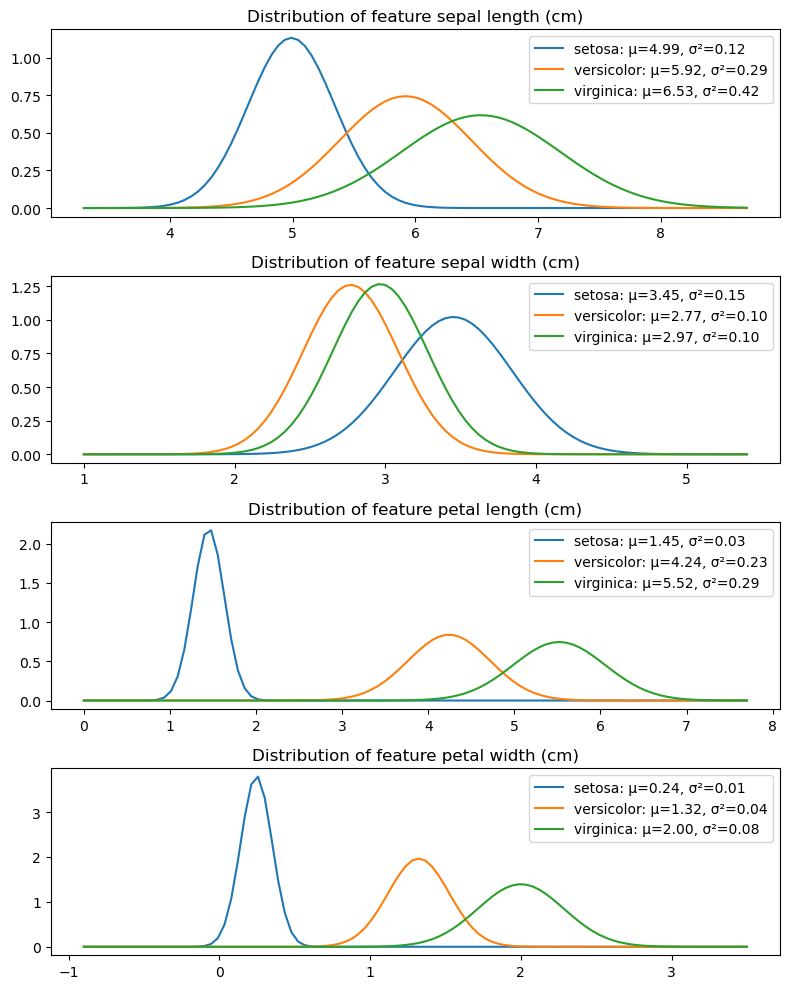

In [6]:
feature_names = iris.feature_names
class_labels = iris.target_names

fig, axes = plt.subplots(nrows=len(feature_names), ncols=1, figsize=(8, 10))

for i in range(len(feature_names)):
    # Select the ith feature
    feature = X_train[:, i]

    # Create a grid of values for plotting the distribution
    x_min, x_max = feature.min() - 1, feature.max() + 1
    grid = np.linspace(x_min, x_max, 100)

    # Plot the distributions for each class
    for j in range(len(class_labels)):
        mean = gnb.theta_[j, i]
        variance = gnb.var_[j, i]
        gaussian = (1 / np.sqrt(2 * np.pi * variance)) * np.exp(-((grid - mean) ** 2) / (2 * variance))
        axes[i].plot(grid, gaussian, label=f'{class_labels[j]}: μ={mean:.2f}, σ²={variance:.2f}')

    axes[i].set_title(f'Distribution of feature {feature_names[i]}')
    axes[i].legend()

plt.tight_layout()
plt.show()


## Bernoulli Naive Bayes

Bernoulli Naive Bayes is a variant of the Naive Bayes algorithm which is particularly suited for binary (Boolean) features. It's based on the Bernoulli distribution and is useful in scenarios where features can be distinctly present or absent, such as text classification where the presence or absence of a word is used as a feature.

Here's how Bernoulli Naive Bayes works mathematically:

1. **Bernoulli Distribution**: The Bernoulli distribution is a discrete distribution having two possible outcomes labeled by $ n = 0 $ and $ n = 1 $ in which $ n = 1 $ ("success") occurs with probability $ p $ and $ n = 0 $ ("failure") occurs with probability $ q = 1 - p $, where $ 0 < p < 1 $. Its probability mass function is given by:

   $$ P(n|p) = p^n (1-p)^{1-n} $$

   for $ n = 0 $ or $ n = 1 $.

2. **Bernoulli Naive Bayes Model**: In the context of Naive Bayes, the Bernoulli model calculates the probability of a document $ d $ being in class $ c $ as follows:

   $$ P(c|d) = \frac{P(d|c)P(c)}{P(d)} $$

   where:
   - $ P(c|d) $ is the posterior probability of class $ c $ given document $ d $.
   - $ P(d|c) $ is the likelihood which is the probability of document $ d $ given class $ c $.
   - $ P(c) $ is the prior probability of class $ c $.
   - $ P(d) $ is the prior probability of document $ d $.

3. **Assuming Independence**: Similar to other Naive Bayes models, the Bernoulli model assumes that the features (in this case, the presence or absence of words) are independent given the class label. The likelihood $ P(d|c) $ is then computed as the product of the individual probabilities for each feature:

   $$ P(d|c) = \prod_{i=1}^{n} P(f_i|c) $$

   where $ f_i $ is the $ i $-th feature (word) in the document, and $ n $ is the total number of features.

4. **Feature Probabilities**: For each feature $ i $, the probability $ P(f_i|c) $ is calculated using the Bernoulli distribution:

   $$ P(f_i|c) = p_i^{f_i} (1-p_i)^{1-f_i} $$

   where $ p_i $ is the probability of feature $ i $ occurring in class $ c $.

5. **Prediction**: To classify a new document $ d $, the Bernoulli Naive Bayes model calculates the posterior probability for each class $ c $ and selects the class with the highest probability:

   $$ \hat{c} = \arg\max_c P(c|d) $$

   Since $ P(d) $ is constant for all classes, it can be ignored in the calculation, simplifying the prediction to:

   $$ \hat{c} = \arg\max_c P(d|c)P(c) $$

   $$ \hat{c} = \arg\max_c \prod_{i=1}^{n} P(f_i|c)P(c) $$

In practice, to prevent numerical underflow from the product of many probabilities, logarithms are used:

   $$ \hat{c} = \arg\max_c \sum_{i=1}^{n} \log P(f_i|c) + \log P(c) $$

This is a high-level overview of the Bernoulli Naive Bayes model with mathematical expressions. It's a powerful algorithm for binary classification problems, especially in text analysis and spam filtering.


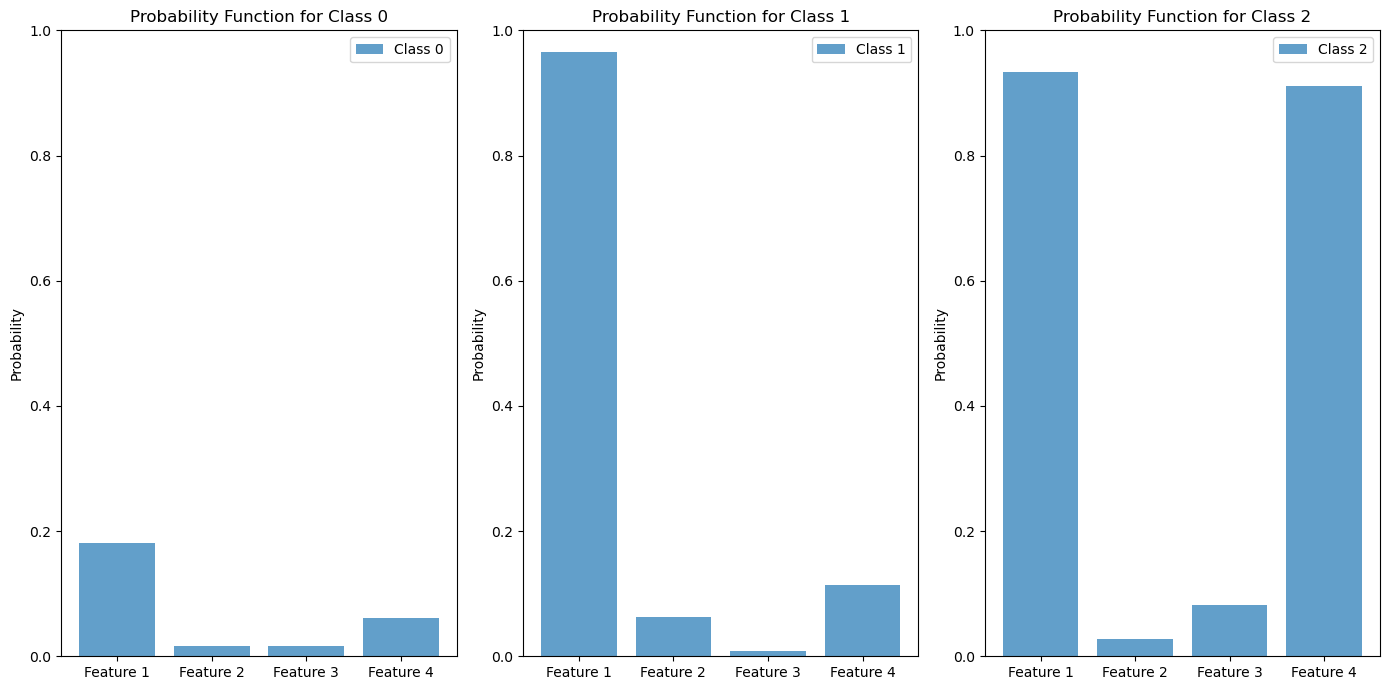

In [11]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate some binary data with 4 features and 3 classes
X, y = make_classification(n_samples=1000, n_features=4, n_informative=4, n_redundant=0, n_classes=3, random_state=42, flip_y=0.1, class_sep=2, n_clusters_per_class=1)
X = np.where(X > 0, 1, 0)  # Binarize the data

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create and fit the model
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

# Feature probabilities
feature_probs = bnb.feature_log_prob_

# Visualize the probability function of the features
fig, ax = plt.subplots(1, 3, figsize=(14, 7))

for i in range(3):
    ax[i].bar(['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4'], np.exp(feature_probs[i]), alpha=0.7, label=f'Class {i}')
    ax[i].set_title(f'Probability Function for Class {i}')
    ax[i].set_ylabel('Probability')
    ax[i].set_ylim([0, 1])
    ax[i].legend()

plt.tight_layout()
plt.show()


## Multinomial Naive Bayes

Multinomial Naive Bayes (MNB) is a probabilistic learning method commonly used in Natural Language Processing (NLP). The model is based on the Bayes theorem and assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature (naive assumption of feature independence).

Here's a breakdown of the mathematical expressions involved in MNB:

1. **Bayes' Theorem**: The foundation of Naive Bayes, including MNB, is Bayes' theorem, which in the context of classification, is expressed as:

   $$ P(C_k | x) = \frac{P(x | C_k) P(C_k)}{P(x)} $$

   where:
   - $ P(C_k | x) $ is the posterior probability of class $ C_k $ given predictor $ x $.
   - $ P(x | C_k) $ is the likelihood which is the probability of predictor given class $ C_k $.
   - $ P(C_k) $ is the prior probability of class $ C_k $.
   - $ P(x) $ is the prior probability of predictor.

2. **Likelihood Estimation**: In MNB, the likelihood $ P(x | C_k) $ is calculated using the multinomial distribution, which is suitable for features that represent counts or frequencies (like word counts in text classification). The likelihood function for a document $ d $ in class $ C $ with the multinomial distribution is given by:

   $$ P(x_1, x_2, ..., x_n | C_k) = \frac{(\sum_{i=1}^{n} x_i)!}{\prod_{i=1}^{n} x_i!} \prod_{i=1}^{n} p_{ki}^{x_i} $$

   where:
   - $ x_i $ is the frequency of feature $ i $ in document $ d $.
   - $ p_{ki} $ is the probability of feature $ i $ occurring in documents of class $ C_k $.

3. **Parameter Estimation**: The parameters $ p_{ki} $ are typically estimated by a smoothed version of maximum likelihood, i.e., the relative frequency counting:

   $$ p_{ki} = \frac{N_{ki} + \alpha}{N_k + \alpha n} $$

   where:
   - $ N_{ki} $ is the number of times feature $ i $ appears in a sample of class $ C_k $.
   - $ N_k $ is the total count of all features for class $ C_k $.
   - $ n $ is the number of features.
   - $ \alpha $ is the smoothing parameter.

4. **Class Prediction**: For a new document $ d $, MNB calculates the posterior probability for each class $ C_k $ and chooses the class with the highest probability:

   $$ \hat{C} = \arg\max_{C_k} P(C_k | x) $$

   Since $ P(x) $ is constant for all classes, it can be ignored in the calculation, simplifying the prediction to:

   $$ \hat{C} = \arg\max_{C_k} P(x | C_k) P(C_k) $$

   $$ \hat{C} = \arg\max_{C_k} \prod_{i=1}^{n} p_{ki}^{x_i} P(C_k) $$

In practice, to prevent numerical underflow from the product of many probabilities, logarithms are used:

   $$ \hat{C} = \arg\max_{C_k} \sum_{i=1}^{n} \log(p_{ki}) x_i + \log P(C_k) $$

This is a high-level overview of the Multinomial Naive Bayes model with mathematical expressions. It's a powerful algorithm for classification problems where feature vectors represent the frequencies of events or counts.


/var/folders/4_/11zd5rrn2d58rmlfjj39rclh0000gn/T/ipykernel_76860/3495197995.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(np.array(feature_names)[sorted_indices], rotation=45)
/var/folders/4_/11zd5rrn2d58rmlfjj39rclh0000gn/T/ipykernel_76860/3495197995.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(np.array(feature_names)[sorted_indices], rotation=45)


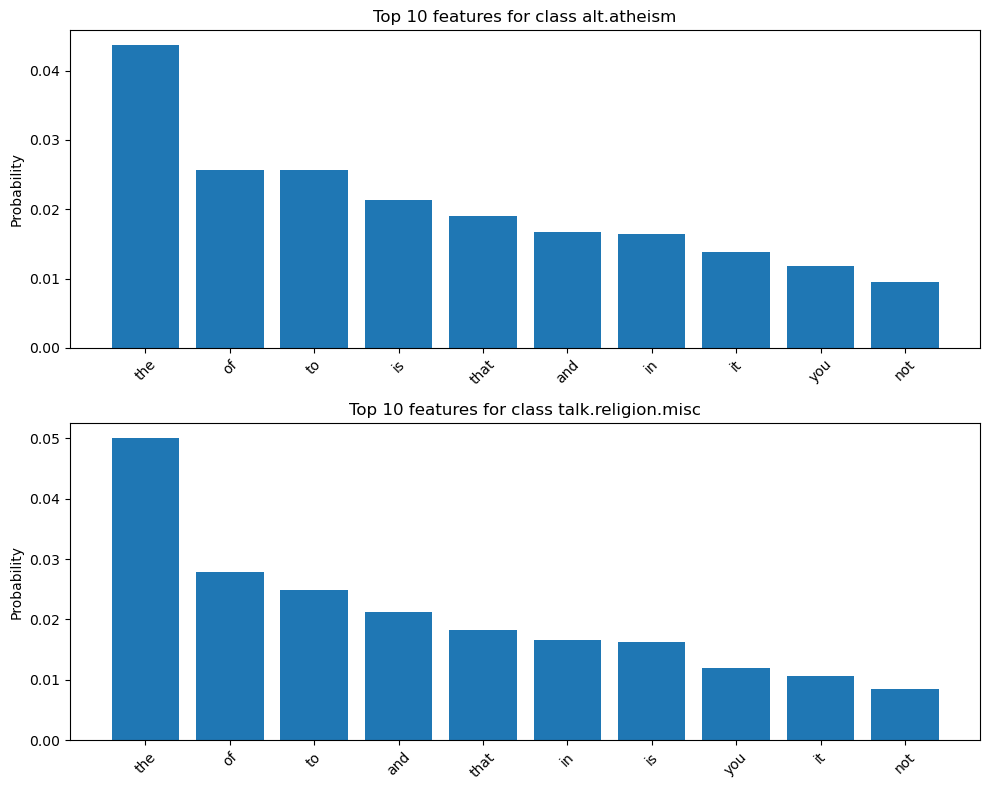

In [12]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import fetch_20newsgroups

# Load the training data
categories = ['alt.atheism', 'talk.religion.misc']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)

# Convert the text documents to a matrix of token counts
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(newsgroups_train.data)

# Train the Multinomial Naive Bayes classifier
clf = MultinomialNB(alpha=0.1)
clf.fit(X_train_counts, newsgroups_train.target)

# Get the feature names
feature_names = vectorizer.get_feature_names_out()

# Get the log-probabilities of features given a class
feature_log_prob = clf.feature_log_prob_

# Visualize the top 10 features for each class
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

for i in range(2):
    sorted_indices = np.argsort(feature_log_prob[i])[::-1][:10]
    ax[i].bar(np.array(feature_names)[sorted_indices], np.exp(feature_log_prob[i][sorted_indices]))
    ax[i].set_title(f'Top 10 features for class {newsgroups_train.target_names[i]}')
    ax[i].set_ylabel('Probability')
    ax[i].set_xticklabels(np.array(feature_names)[sorted_indices], rotation=45)

plt.tight_layout()
plt.show()


MultinomialNB and BernoulliNB have a single parameter, alpha, which controls model complexity. The higher the value of alpha, the more complex the model. The default value of alpha is 1.0.


- GaussianNB is used on high-dimensional data / BernoulliNB and MultinomialNB are used for sparse count data such as text.
- MultinomialNB usually performs better than BernoulliNB, particularly on datasets with a relatively large number of non-zero features (i.e., large documents).

Pros:
- very fast to train and predict
- simple to understand
- works well with high-dimensional data
- robust to the parameters

NB models are great baseline models and are often used on very large datasets, where training even a linear model might take too long.